<a href="https://colab.research.google.com/github/cariverosa/Riveros-Narino-QM1/blob/main/QM_HW1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Punto 1A

$\mu_{\lambda}(T) = \frac{8 \pi h}{\lambda ^3}\frac{1}{exp(\frac{hc}{\lambda k T}) -1}$

In [2]:
def energy_density(v, T):
  Kb = 1.38*10**-23 #[J/K]
  h = 6.626*10**-34 #[J.s]
  c = 3*10**8 #[m/s]
  x1 = 8*np.pi*h/v**3
  E = h*c
  E1 = v*Kb*T
  x2 = (np.exp(E/E1)-1)**-1
  x = x1*x2
  return x

In [3]:
v = np.linspace(100, 3000, 1000)
v1 = v*10**-9

In [4]:
T1, T2, T3, T4 = 10000, 8000, 5000, 3000
density1, density2, density3, density4 = energy_density(v1, T1), energy_density(v1, T2), energy_density(v1, T3), energy_density(v1, T4)

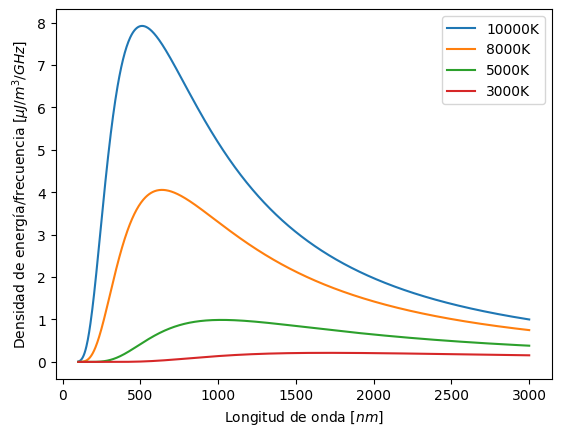

In [5]:
plt.figure()
plt.plot(v1*10**9, density1*10**15, label = '10000K')
plt.plot(v1*10**9, density2*10**15, label = '8000K')
plt.plot(v1*10**9, density3*10**15, label = '5000K')
plt.plot(v1*10**9, density4*10**15, label = '3000K')
plt.xlabel('Longitud de onda $[nm]$')
plt.ylabel('Densidad de energía/frecuencia $[\mu J / m^3 / GHz]$')
plt.legend()

#Punto 1B

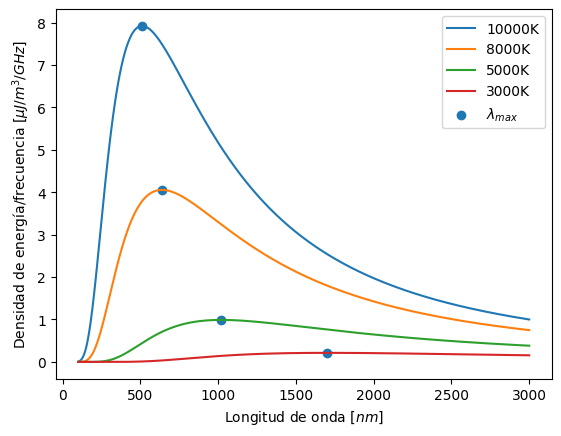

In [6]:
max_d1 = np.where(max(density1) == density1) #Encuentra el index del valor máximo de la densidad de energía
lambda1=v1[max_d1]                           #Encuentra el valor de lambda máximo con el index de la parte anterior

max_d2 = np.where(max(density2) == density2)
lambda2=v1[max_d2]

max_d3 = np.where(max(density3) == density3)
lambda3=v1[max_d3]

max_d4 = np.where(max(density4) == density4)
lambda4=v1[max_d4]

lambdas_max = np.array([lambda1, lambda2, lambda3, lambda4])
density_max = np.array([max(density1), max(density2), max(density3), max(density4)])

plt.figure()
plt.plot(v1*10**9, density1*10**15, label = '10000K')
plt.plot(v1*10**9, density2*10**15, label = '8000K')
plt.plot(v1*10**9, density3*10**15, label = '5000K')
plt.plot(v1*10**9, density4*10**15, label = '3000K')
plt.xlabel('Longitud de onda $[nm]$')
plt.ylabel('Densidad de energía/frecuencia $[\mu J / m^3 / GHz]$')
plt.scatter(lambdas_max*10**9, density_max*10**15, label = '$\lambda_{max}$')
plt.legend()

In [7]:
print('Los valores de las longitudes de onda donde se encuentran los picos corresponden a: {} nm para T = 10000K, {} nm para T = 8000K, {} nm para T = 6000K, {} nm para T = 3000K: '.format(lambda1*10**9, lambda2*10**9, lambda3*10**9, lambda4*10**9))
print('A su vez, {} y {} nm corresponden al espectro visible; pero {} y {} nm corresponden al espectro infrarrojo'. format(lambda1*10**9, lambda2*10**9, lambda3*10**9, lambda4*10**9))

Los valores de las longitudes de onda donde se encuentran los picos corresponden a: [509.30930931] nm para T = 10000K, [637.03703704] nm para T = 8000K, [1020.22022022] nm para T = 6000K, [1702.4024024] nm para T = 3000K: 
A su vez, [509.30930931] y [637.03703704] nm corresponden al espectro visible; pero [1020.22022022] y [1702.4024024] nm corresponden al espectro infrarrojo


#Punto 1C


$B(\nu, T) = \frac{8 \pi \nu^2}{c^3} \frac{h \nu}{e^{\frac{h \nu}{k T}}-1}$

Ley de Planck en términos de la frecuencia \\

$B_{\text{RJ}}(\nu, T) = \frac{8 \pi \nu^2 k T}{c^3}$

Ley de Rayleigh Jeans \\

$B_{\text{Wien}}(\nu, T) = \frac{8 \pi \nu^3 h}{c^3} e^{-\frac{h \nu}{k T}}$

Aproximación de Wien

In [8]:
#Constantes

K = 1.38*10**-23 #[J/K]
h = 6.626*10**-34 #[J.s]
c = 3*10**8 #[m/s]
T = 5000 #[K]

def planck_freq(nu):
  x1 = (8*np.pi*nu**2)/c**3
  x2 = (h*nu)/(np.exp((h*nu)/(K*T))-1)
  x = x1*x2
  return x

freqs = np.linspace(0.01, 1000, 200)
freqs_scale = freqs*10**12
planck = planck_freq(freqs_scale)

def Rayleigh_jeans(nu):
  x = (8*np.pi*nu**2*K*T)/(c**3)
  return x

Rayleigh = Rayleigh_jeans(freqs_scale)

def wien(nu):
  x1 = 8*np.pi*h*nu**3/c**3
  x2 = np.exp((-h*nu)/(K*T))
  return x1*x2

Wien = wien(freqs_scale)

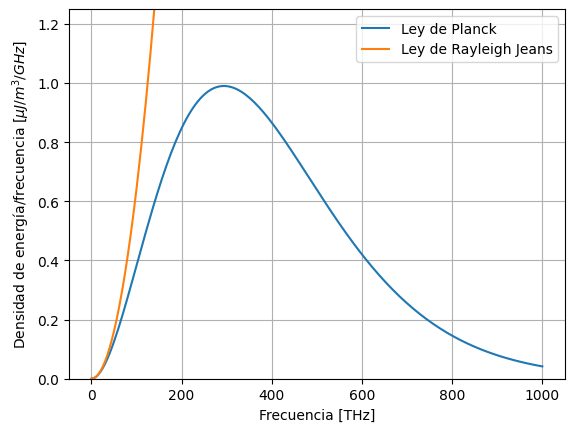

In [9]:
plt.figure()
plt.plot(freqs_scale*10**-12, planck*10**15, label = 'Ley de Planck')
plt.plot(freqs_scale*10**-12, Rayleigh*10**15, label = 'Ley de Rayleigh Jeans')
#plt.plot(freqs_scale*10**-12, Wien*10**15, label = 'Aproximación de Wien')
plt.ylim(0, 1.25)
plt.xlabel('Frecuencia [THz]')
plt.ylabel('Densidad de energía/frecuencia $[\mu J / m^3 / GHz]$')
plt.grid()
plt.legend()
plt.show()

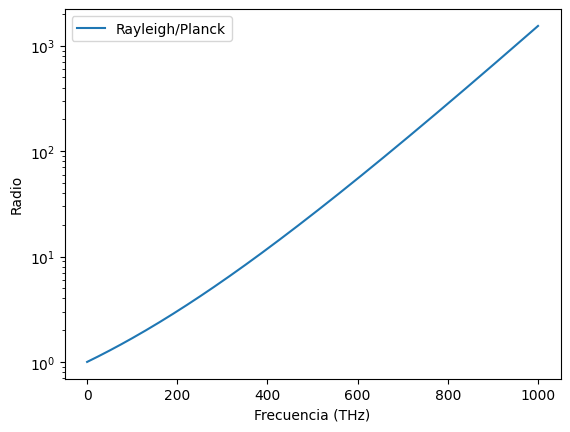

In [10]:
planck_values = planck_freq(freqs_scale)
rayleigh_values = Rayleigh_jeans(freqs_scale)
wien_values = wien(freqs_scale)

rayleigh_planck_ratio = rayleigh_values / planck_values
wien_planck_ratio = wien_values / planck_values

plt.plot(freqs_scale*10**-12, rayleigh_planck_ratio, label="Rayleigh/Planck")
#plt.plot(freqs_scale, wien_planck_ratio, label="Wien/Planck")
plt.xlabel("Frecuencia (THz)")
plt.ylabel("Radio")
plt.legend()
plt.yscale("log")
plt.show()

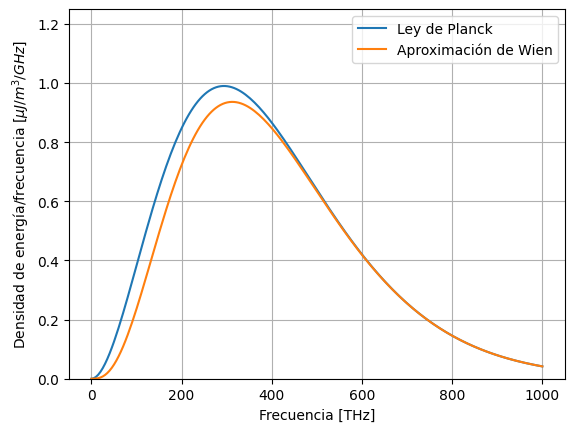

In [11]:
plt.figure()
plt.plot(freqs_scale*10**-12, planck*10**15, label = 'Ley de Planck')
#plt.plot(freqs_scale*10**-12, Rayleigh*10**15, label = 'Ley de Rayleigh Jeans')
plt.plot(freqs_scale*10**-12, Wien*10**15, label = 'Aproximación de Wien')
plt.ylim(0, 1.25)
plt.xlabel('Frecuencia [THz]')
plt.ylabel('Densidad de energía/frecuencia $[\mu J / m^3 / GHz]$')
plt.grid()
plt.legend()
plt.show()

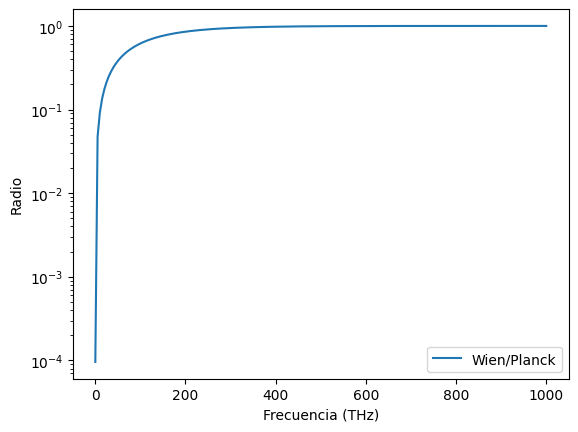

In [12]:
#plt.plot(freqs_scale, rayleigh_planck_ratio, label="Rayleigh/Planck")
plt.plot(freqs_scale*10**-12, wien_planck_ratio, label="Wien/Planck")
plt.xlabel("Frecuencia (THz)")
plt.ylabel("Radio")
plt.legend()
plt.yscale("log")
plt.show()

Para realizar la comparación cuantitativa de los dos pares de curvas se calculó el radio entre los puntos de las gráficas de ambas funciones, es decir, Rayleigh/Planck y Wien/Planck. Esto nos da a entender para cada punto en el rango de frecuencias presentado [0 THz, 1000 THz], cual es la concordancia entre una gráfica y la otra. Si el radio es cercano a 1 en algún punto significa que en ese punto hay un alto grado de concordancia entre ambas funciones.

En el caso de la comparación entre la ley de Planck y la de Rayleigh-Jeans se puede evidenciar que a lo largo del rango calculado el radio crece exponencialmente a mayores frecuencias de manera que la concordancia entre las funciones disminuye de la misma manera ya que el valor del radio se aleja cada vez más de 1. La región donde el radio es más cercano a 1 es cuando la frecuencia es menor a 200 THz lo que significa que esta es la región con mayor concordancia entre ambas curvas.

Por otro lado, en la comparación entre la ley de Planck y la aproximación de Wien el radio calculado entre las dos funciones se acerca asintóticamente a 1 a medida que aumenta la frecuencia. De manera contraria a la comparación entre Planck y Rayleigh-Jeans la región más alejada de 1, es decir de menor concordancia, es entre 0 THZ y 200 THz.